# Text to Image

In [1]:
import requests
from PIL import Image
import io
import base64

api_url = "http://localhost:80/text2img/"

request_body = {
  "prompt": "a book cover",
  "width": 512,
  "height": 768,
  "cfg_scale": 7,
  "steps": 30,
  "number_of_images": 1,
  "seed": 208513106212
}

response = requests.post(api_url, json=request_body)

print(response.status_code)

200


In [5]:
def decode_image(img):
    img = io.BytesIO(base64.b64decode(img))
    img = Image.open(img)
    return img

images_base64 = response.json()['images']
images = [decode_image(img) for img in images_base64]

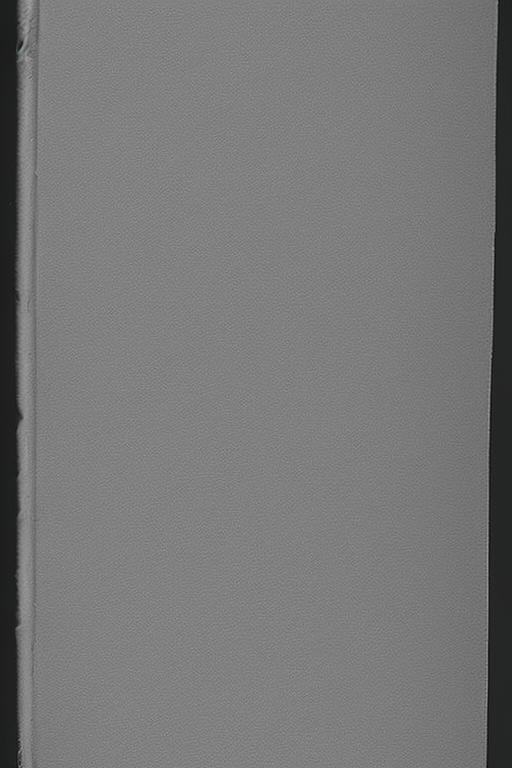

In [6]:
for img in images:
    display(img)

# Img2Img

In [114]:
def url_to_base64(url: str) -> str:
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    # important the right size and rgb
    image = image.resize((512, 512)).convert("RGB")
    display(image)
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    img_base64 = base64.b64encode(buffered.getvalue()).decode()
    return img_base64

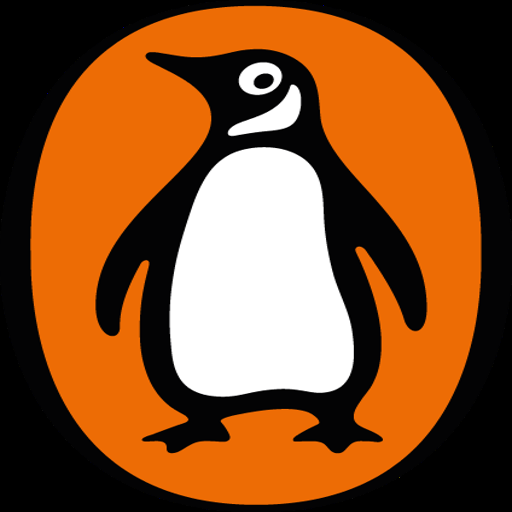

In [115]:
request_body = {
  "prompt": "reinassance painting of a penguin.",
  "cfg_scale": 7,
  "steps": 30,
  "number_of_images": 1,
  "seed": 208513106212
}

# add in the body of the request the original image and the mask
request_body['image'] = url_to_base64("https://www.penguinlibros.com/co/themes/megustaleer/assets/img/penguin.png")

In [118]:
api_url = "http://localhost:80/img2img/"

response = requests.post(api_url, json=request_body)

print(response.status_code)

200


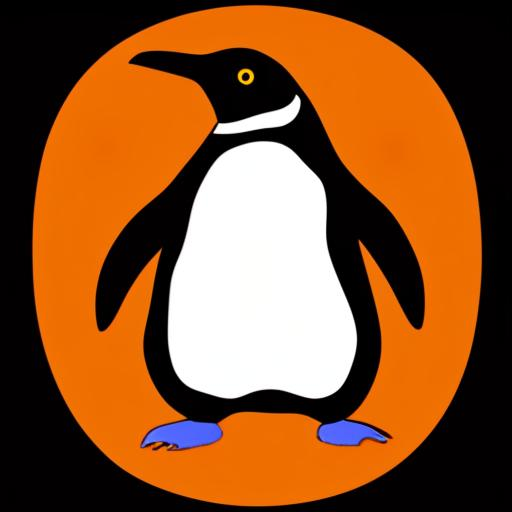

In [119]:
images_base64 = response.json()['images']
images = [decode_image(img) for img in images_base64]
for img in images:
    display(img)

# Inpainting

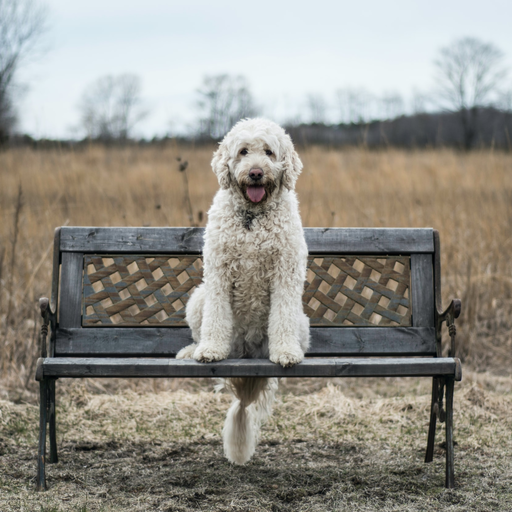

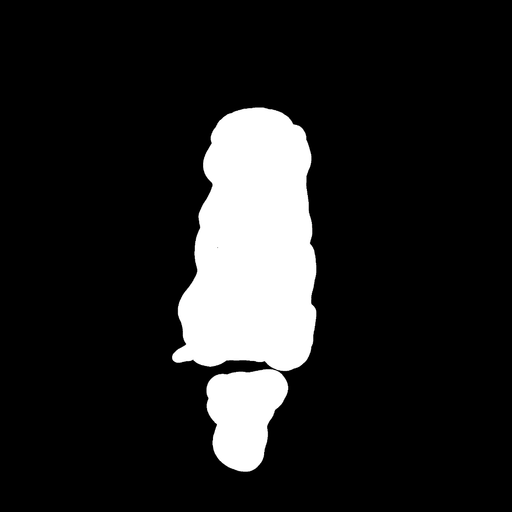

In [102]:
request_body = {
  "prompt": "reinassance painting of a penguin.",
  "cfg_scale": 7,
  "steps": 30,
  "number_of_images": 1,
  "seed": 208513106212
}

# add in the body of the request the original image and the mask
request_body['image'] = url_to_base64("https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png")
request_body['mask_image'] = url_to_base64("https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png")

In [104]:
api_url = "http://localhost:80/inpainting/"

response = requests.post(api_url, json=request_body)

print(response.status_code)

200


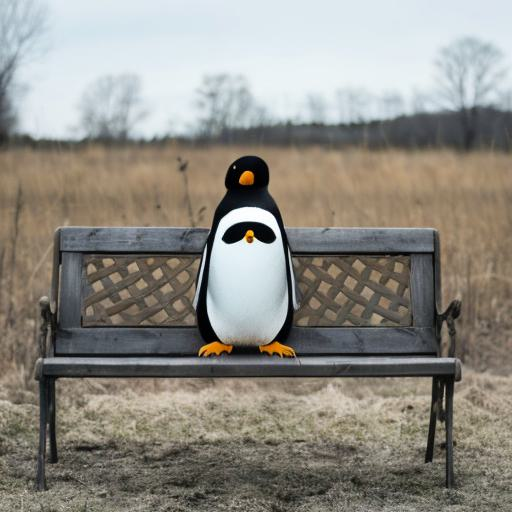

In [106]:
images_base64 = response.json()['images']
images = [decode_image(img) for img in images_base64]
for img in images:
    display(img)